<a href="https://colab.research.google.com/github/nilijing/Billboard-Rankings-Analysis-Using-Machine-Learning-Techniques-On-Spotify/blob/main/Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spotify_token

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import random
import warnings
#import spotify_token as st
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import base64
from secrets import *
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split,cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
sns.set()

In [ ]:
clientId= '3bf66320d2444a66a0468d72aa84bdf7'
clientSecret= '2454332bfbd1426993fbcfaf38b8bb54'
client_credentials_manager = SpotifyClientCredentials(client_id=clientId, client_secret=clientSecret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#Authorization 
url = "https://accounts.spotify.com/api/token"
headers = {}
data = {}
#Encode as Base64
message = f"{clientId}:{clientSecret}"
messageBytes = message.encode('ascii')
base64Bytes = base64.b64encode(messageBytes)
base64Message = base64Bytes.decode('ascii')

headers['Authorization'] = f"Basic {base64Message}"
data['grant_type'] = "client_credentials"
r = requests.post(url, headers=headers, data=data)

token = r.json()['access_token']
headers = {"Authorization": "Bearer " + token}

#1. Get data

In [ ]:
'''
lists=['Billboard Hot 100','Billboard Year-End Hot 100: 2019','Billboard 2018 - Year End Hot 100 Songs','Billboard 2017 - Year End Hot 100 Songs',
       'Billboard 2016 - Year End Hot 100 Songs','Billboard 2015 - Year End Hot 100 Songs','2014 Billboard Hot 100 Songs','2013 Billboard Hot 100',
       '2012 Billboard Hot 100 Year-End Chart','Billboard Top 100 2011','Billboard 2010 Top 100','Billboard Top 100 - 2009','Billboard Top 100 - 2008',
       '2007 Billboard Year End Hot 100','2006 Billboard Top 100','2005 Billboard Top 100','2004 Billboard Top 100']
'''

"\nlists=['Billboard Hot 100','Billboard Year-End Hot 100: 2019','Billboard 2018 - Year End Hot 100 Songs','Billboard 2017 - Year End Hot 100 Songs',\n       'Billboard 2016 - Year End Hot 100 Songs','Billboard 2015 - Year End Hot 100 Songs','2014 Billboard Hot 100 Songs','2013 Billboard Hot 100',\n       '2012 Billboard Hot 100 Year-End Chart','Billboard Top 100 2011','Billboard 2010 Top 100','Billboard Top 100 - 2009','Billboard Top 100 - 2008',\n       '2007 Billboard Year End Hot 100','2006 Billboard Top 100','2005 Billboard Top 100','2004 Billboard Top 100']\n"

In [ ]:
lists=['Billboard Hot 100','Billboard Year-End Hot 100: 2019','Billboard 2018 - Year End Hot 100 Songs','Billboard 2017 - Year End Hot 100 Songs',
       'Billboard 2016 - Year End Hot 100 Songs','Billboard 2015 - Year End Hot 100 Songs','2014 Billboard Hot 100 Songs','2013 Billboard Hot 100',
       '2012 Billboard Hot 100 Year-End Chart','Billboard Top 100 2011','Billboard 2010 Top 100']

In [ ]:
#get attributes
def attributes(song_id):
  rrr1=requests.get( url='https://api.spotify.com/v1/audio-features/'+song_id, headers=headers ).text
  rrr1_dict=json.loads(rrr1) 
  return(rrr1_dict)

def artist_names(song_info):
  names=[]
  for i in range(0,len(song_info)):
    nm=song_info[i]['name']
    names.append(nm)
  artist_nms=', '.join(names)
  return(artist_nms)

def get_list_info(res_dict):
  song_attributes=[]
  song_nms=[]
  artists=[]
  pop=[] #tracks=res_dict.get('tracks')['items']

  for item in res_dict.get('tracks')['items']:
    song_id= item['track']['uri'].split(':')[2]
    song_info = item['track']['artists'] 
    song_nm = item['track']['name'] 

    song_attributes.append(  attributes(song_id) )

    song_nms.append(song_nm)

    artists.append( artist_names(song_info)  )

    pop.append( item['track']['popularity'] )
    
  #song attriutes
  songs = pd.DataFrame(song_attributes)   
  #song name 
  songs['song_name'] =song_nms
  #singer
  songs['artists names']=artists
  #popularity
  songs['popularity']=pop

  return songs

#total_songs = pd.concat([my_songs]).reset_index(drop=True)

In [ ]:
dicts=[]

dff= pd.DataFrame( columns=['danceability','energy','key','loudness',	'mode',	'speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href','analysis_url','duration_ms','time_signature','song_name','artists names','popularity'])
print(dff)

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, song_name, artists names, popularity]
Index: []

[0 rows x 21 columns]


In [ ]:
for i in range(len(lists)): 
  list_nm= lists[i]    #chosen playlist
  list_info= sp.search(list_nm,type='playlist')    #search query
  list_url=list_info['playlists']['items'][0]['href']  #dict
  response=requests.get(url=list_url, headers=headers) 
  res_dic=json.loads(response.text) 
  
  s=get_list_info(res_dic) 
  pd.set_option('display.max_columns', None)
  dff=pd.concat( [dff,s] )

pd.set_option('display.max_columns', None)  #pd.set_option('display.max_rows', None)
print(dff) 

In [ ]:
#reset index
dff['ranking']=dff.index
pd.set_option('display.max_rows', None)
print(dff.head(150))

In [ ]:
dff['ranking']=dff['ranking']+1
dff.head(3)

In [ ]:
dff=dff.reset_index(drop=True)
dff

In [ ]:
#sort columns order
bb=dff.loc[:,['id','song_name','artists names','danceability','energy','key','loudness','mode',	'speechiness','acousticness','instrumentalness','liveness','valence','tempo',	'duration_ms','time_signature','popularity','ranking']]
bb.head(3)

In [ ]:
#bb.to_csv('raw data.csv',encoding='gbk')
bb.to_csv('raw data.csv')

In [ ]:
##method 1:for basic
bb=pd.read_csv('/Users/yijingtan/Desktop/project/spotify/raw data.csv',index_col=0)

'''
##method 2: for google colab
from google.colab import files
uploaded = files.upload()
import io
bb=pd.read_csv(io.BytesIO(uploaded['raw data.csv']),index_col=0)
'''

"\n##method 2: for google colab\nfrom google.colab import files\nuploaded = files.upload()\nimport io\nbb=pd.read_csv(io.BytesIO(uploaded['raw data.csv']),index_col=0)\n"

In [ ]:
bb.describe(include = 'O')

,type,id,uri,track_href,analysis_url,song_name,artists names,error
count,888,888,888,888,888,1093,1093,205
unique,1,857,857,857,857,990,650,2
top,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:2771LMNxwf62FTAdpJMQfM,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/45Eg...,Animals,Drake,"{'status': 429, 'message': 'API rate limit exc..."
freq,888,2,2,2,2,3,16,204


In [ ]:
bb.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artists names,popularity,error,ranking
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,...,888,888,888,888.000000,888.000000,1093,1093,1093.000000,205,1093.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,857,857,857,NaN,NaN,990,650,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,spotify:track:2771LMNxwf62FTAdpJMQfM,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/45Eg...,NaN,NaN,Animals,Drake,NaN,"{'status': 429, 'message': 'API rate limit exc...",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,NaN,NaN,3,16,NaN,204,NaN
mean,0.666886,0.676983,5.415541,-5.756955,0.623874,0.106002,0.147205,0.004023,0.177014,0.510164,...,NaN,NaN,NaN,219487.802928,3.989865,NaN,NaN,52.946935,NaN,50.193047
std,0.136429,0.157626,3.640816,2.698557,0.484685,0.101044,0.190801,0.035565,0.131787,0.216491,...,NaN,NaN,NaN,36597.586996,0.270514,NaN,NaN,31.929996,NaN,28.714495
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,78200.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000
25%,0.586750,0.578000,2.000000,-6.737500,0.000000,0.041475,0.018300,0.000000,0.093975,0.344750,...,NaN,NaN,NaN,198659.750000,4.000000,NaN,NaN,22.000000,NaN,25.000000
50%,0.677000,0.696000,6.000000,-5.413000,1.000000,0.060000,0.067950,0.000000,0.124500,0.505000,...,NaN,NaN,NaN,217753.500000,4.000000,NaN,NaN,68.000000,NaN,50.000000
75%,0.755500,0.797000,8.250000,-4.324500,1.000000,0.126500,0.203000,0.000008,0.212000,0.684000,...,NaN,NaN,NaN,237653.750000,4.000000,NaN,NaN,77.000000,NaN,75.000000


In [ ]:
bb

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artists names,popularity,error,ranking
0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.22100,0.000000,0.2720,0.756,...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,https://api.spotify.com/v1/audio-analysis/3tjF...,140526.0,4.0,Mood (feat. iann dior),"24kGoldn, iann dior",99,NaN,1
1,0.736,0.802,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,0.675,...,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,positions,Ariana Grande,88,NaN,2
2,0.554,0.576,6.0,-6.495,1.0,0.0399,0.17100,0.000000,0.1590,0.409,...,spotify:track:5cYFwgA5dHoqR3xGnlr9ew,https://api.spotify.com/v1/tracks/5cYFwgA5dHoq...,https://api.spotify.com/v1/audio-analysis/5cYF...,209763.0,4.0,I Hope (feat. Charlie Puth),"Gabby Barrett, Charlie Puth",73,NaN,3
3,0.761,0.518,0.0,-8.871,1.0,0.1340,0.24400,0.000035,0.1070,0.522,...,spotify:track:2SAqBLGA283SUiwJ3xOUVI,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,https://api.spotify.com/v1/audio-analysis/2SAq...,261493.0,4.0,Laugh Now Cry Later (feat. Lil Durk),"Drake, Lil Durk",93,NaN,4
4,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,4.0,Blinding Lights,The Weeknd,96,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0.434,0.764,5.0,-3.450,1.0,0.0299,0.05340,0.000000,0.4370,0.309,...,spotify:track:4gWTBq5Jftq5CEKYpLXD8R,https://api.spotify.com/v1/tracks/4gWTBq5Jftq5...,https://api.spotify.com/v1/audio-analysis/4gWT...,206413.0,4.0,Life After You,Daughtry,52,NaN,96
1089,0.541,0.812,4.0,-3.764,1.0,0.0336,0.20300,0.000000,0.4200,0.607,...,spotify:track:4ZC8hXXqu2hPcDLw9QTdtQ,https://api.spotify.com/v1/tracks/4ZC8hXXqu2hP...,https://api.spotify.com/v1/audio-analysis/4ZC8...,201627.0,4.0,Smile,Uncle Kracker,69,NaN,97
1090,0.790,0.454,9.0,-4.603,1.0,0.1840,0.19700,0.000121,0.0938,0.496,...,spotify:track:1BPVgamrhPaT79ol3Xz0J9,https://api.spotify.com/v1/tracks/1BPVgamrhPaT...,https://api.spotify.com/v1/audio-analysis/1BPV...,239760.0,4.0,Teach Me How to Dougie (Explicit Version),Cali Swag District,0,NaN,98
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Try Sleeping with a Broken Heart,Alicia Keys,62,"{'status': 429, 'message': 'API rate limit exc...",99


#2. Process data

In [ ]:
pd.set_option('precision',6)

In [ ]:
#check datatype
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 23 columns):
danceability        888 non-null float64
energy              888 non-null float64
key                 888 non-null float64
loudness            888 non-null float64
mode                888 non-null float64
speechiness         888 non-null float64
acousticness        888 non-null float64
instrumentalness    888 non-null float64
liveness            888 non-null float64
valence             888 non-null float64
tempo               888 non-null float64
type                888 non-null object
id                  888 non-null object
uri                 888 non-null object
track_href          888 non-null object
analysis_url        888 non-null object
duration_ms         888 non-null float64
time_signature      888 non-null float64
song_name           1093 non-null object
artists names       1093 non-null object
popularity          1093 non-null int64
error               205 non-null objec

In [ ]:
#convert to numeric 
bb[['key','mode','duration_ms','time_signature','popularity']]=bb[['key','mode','duration_ms','time_signature','popularity']].apply(pd.to_numeric)
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 23 columns):
danceability        888 non-null float64
energy              888 non-null float64
key                 888 non-null float64
loudness            888 non-null float64
mode                888 non-null float64
speechiness         888 non-null float64
acousticness        888 non-null float64
instrumentalness    888 non-null float64
liveness            888 non-null float64
valence             888 non-null float64
tempo               888 non-null float64
type                888 non-null object
id                  888 non-null object
uri                 888 non-null object
track_href          888 non-null object
analysis_url        888 non-null object
duration_ms         888 non-null float64
time_signature      888 non-null float64
song_name           1093 non-null object
artists names       1093 non-null object
popularity          1093 non-null int64
error               205 non-null objec

In [ ]:
bb

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artists names,popularity,error,ranking
0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.22100,0.000000,0.2720,0.756,...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,https://api.spotify.com/v1/audio-analysis/3tjF...,140526.0,4.0,Mood (feat. iann dior),"24kGoldn, iann dior",99,NaN,1
1,0.736,0.802,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,0.675,...,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,positions,Ariana Grande,88,NaN,2
2,0.554,0.576,6.0,-6.495,1.0,0.0399,0.17100,0.000000,0.1590,0.409,...,spotify:track:5cYFwgA5dHoqR3xGnlr9ew,https://api.spotify.com/v1/tracks/5cYFwgA5dHoq...,https://api.spotify.com/v1/audio-analysis/5cYF...,209763.0,4.0,I Hope (feat. Charlie Puth),"Gabby Barrett, Charlie Puth",73,NaN,3
3,0.761,0.518,0.0,-8.871,1.0,0.1340,0.24400,0.000035,0.1070,0.522,...,spotify:track:2SAqBLGA283SUiwJ3xOUVI,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,https://api.spotify.com/v1/audio-analysis/2SAq...,261493.0,4.0,Laugh Now Cry Later (feat. Lil Durk),"Drake, Lil Durk",93,NaN,4
4,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,4.0,Blinding Lights,The Weeknd,96,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0.434,0.764,5.0,-3.450,1.0,0.0299,0.05340,0.000000,0.4370,0.309,...,spotify:track:4gWTBq5Jftq5CEKYpLXD8R,https://api.spotify.com/v1/tracks/4gWTBq5Jftq5...,https://api.spotify.com/v1/audio-analysis/4gWT...,206413.0,4.0,Life After You,Daughtry,52,NaN,96
1089,0.541,0.812,4.0,-3.764,1.0,0.0336,0.20300,0.000000,0.4200,0.607,...,spotify:track:4ZC8hXXqu2hPcDLw9QTdtQ,https://api.spotify.com/v1/tracks/4ZC8hXXqu2hP...,https://api.spotify.com/v1/audio-analysis/4ZC8...,201627.0,4.0,Smile,Uncle Kracker,69,NaN,97
1090,0.790,0.454,9.0,-4.603,1.0,0.1840,0.19700,0.000121,0.0938,0.496,...,spotify:track:1BPVgamrhPaT79ol3Xz0J9,https://api.spotify.com/v1/tracks/1BPVgamrhPaT...,https://api.spotify.com/v1/audio-analysis/1BPV...,239760.0,4.0,Teach Me How to Dougie (Explicit Version),Cali Swag District,0,NaN,98
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Try Sleeping with a Broken Heart,Alicia Keys,62,"{'status': 429, 'message': 'API rate limit exc...",99


In [ ]:
#check NaN
b=bb.drop('error',axis=1)
b.isnull().any()

In [ ]:
#b=b.fillna(method='ffill')  #.fillna(0)
b.dropna(inplace=True)
b.isnull().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
song_name           False
artists names       False
popularity          False
ranking             False
dtype: bool

In [ ]:
b

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artists names,popularity,ranking
0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.22100,0.000000,0.2720,0.756,...,3tjFYV6RSFtuktYl3ZtYcq,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,https://api.spotify.com/v1/audio-analysis/3tjF...,140526.0,4.0,Mood (feat. iann dior),"24kGoldn, iann dior",99,1
1,0.736,0.802,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,0.675,...,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,positions,Ariana Grande,88,2
2,0.554,0.576,6.0,-6.495,1.0,0.0399,0.17100,0.000000,0.1590,0.409,...,5cYFwgA5dHoqR3xGnlr9ew,spotify:track:5cYFwgA5dHoqR3xGnlr9ew,https://api.spotify.com/v1/tracks/5cYFwgA5dHoq...,https://api.spotify.com/v1/audio-analysis/5cYF...,209763.0,4.0,I Hope (feat. Charlie Puth),"Gabby Barrett, Charlie Puth",73,3
3,0.761,0.518,0.0,-8.871,1.0,0.1340,0.24400,0.000035,0.1070,0.522,...,2SAqBLGA283SUiwJ3xOUVI,spotify:track:2SAqBLGA283SUiwJ3xOUVI,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,https://api.spotify.com/v1/audio-analysis/2SAq...,261493.0,4.0,Laugh Now Cry Later (feat. Lil Durk),"Drake, Lil Durk",93,4
4,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,...,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,4.0,Blinding Lights,The Weeknd,96,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.588,0.684,1.0,-5.154,1.0,0.0288,0.50800,0.000000,0.1410,0.121,...,4xInIiKipU1mtUogJ3ZdYr,spotify:track:4xInIiKipU1mtUogJ3ZdYr,https://api.spotify.com/v1/tracks/4xInIiKipU1m...,https://api.spotify.com/v1/audio-analysis/4xIn...,224867.0,4.0,American Honey,Lady A,63,94
1087,0.676,0.762,1.0,-4.172,1.0,0.0351,0.46100,0.000000,0.0574,0.810,...,3VA8T3rNy5V24AXxNK5u9E,spotify:track:3VA8T3rNy5V24AXxNK5u9E,https://api.spotify.com/v1/tracks/3VA8T3rNy5V2...,https://api.spotify.com/v1/audio-analysis/3VA8...,207493.0,4.0,King of Anything,Sara Bareilles,63,95
1088,0.434,0.764,5.0,-3.450,1.0,0.0299,0.05340,0.000000,0.4370,0.309,...,4gWTBq5Jftq5CEKYpLXD8R,spotify:track:4gWTBq5Jftq5CEKYpLXD8R,https://api.spotify.com/v1/tracks/4gWTBq5Jftq5...,https://api.spotify.com/v1/audio-analysis/4gWT...,206413.0,4.0,Life After You,Daughtry,52,96
1089,0.541,0.812,4.0,-3.764,1.0,0.0336,0.20300,0.000000,0.4200,0.607,...,4ZC8hXXqu2hPcDLw9QTdtQ,spotify:track:4ZC8hXXqu2hPcDLw9QTdtQ,https://api.spotify.com/v1/tracks/4ZC8hXXqu2hP...,https://api.spotify.com/v1/audio-analysis/4ZC8...,201627.0,4.0,Smile,Uncle Kracker,69,97


In [ ]:
b.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,ranking
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.666886,0.676983,5.415541,-5.756955,0.623874,0.106002,0.147205,0.004023,0.177014,0.510164,122.737676,219487.802928,3.989865,50.617117,49.373874
std,0.136429,0.157626,3.640816,2.698557,0.484685,0.101044,0.190801,0.035565,0.131787,0.216491,28.355879,36597.586996,0.270514,32.852028,28.680408
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78200.000000,0.000000,0.000000,1.000000
25%,0.586750,0.578000,2.000000,-6.737500,0.000000,0.041475,0.018300,0.000000,0.093975,0.344750,99.966000,198659.750000,4.000000,3.750000,24.000000
50%,0.677000,0.696000,6.000000,-5.413000,1.000000,0.060000,0.067950,0.000000,0.124500,0.505000,123.454500,217753.500000,4.000000,66.000000,49.000000
75%,0.755500,0.797000,8.250000,-4.324500,1.000000,0.126500,0.203000,0.000008,0.212000,0.684000,139.983000,237653.750000,4.000000,76.000000,74.000000
max,0.970000,0.972000,11.000000,-1.190000,1.000000,0.592000,0.978000,0.680000,0.833000,0.966000,205.932000,484147.000000,5.000000,100.000000,100.000000


In [ ]:
#
b['ranking'].value_counts()

1      11
4      10
5      10
24     10
3      10
       ..
96      8
97      8
98      8
100     4
99      3
Name: ranking, Length: 100, dtype: int64

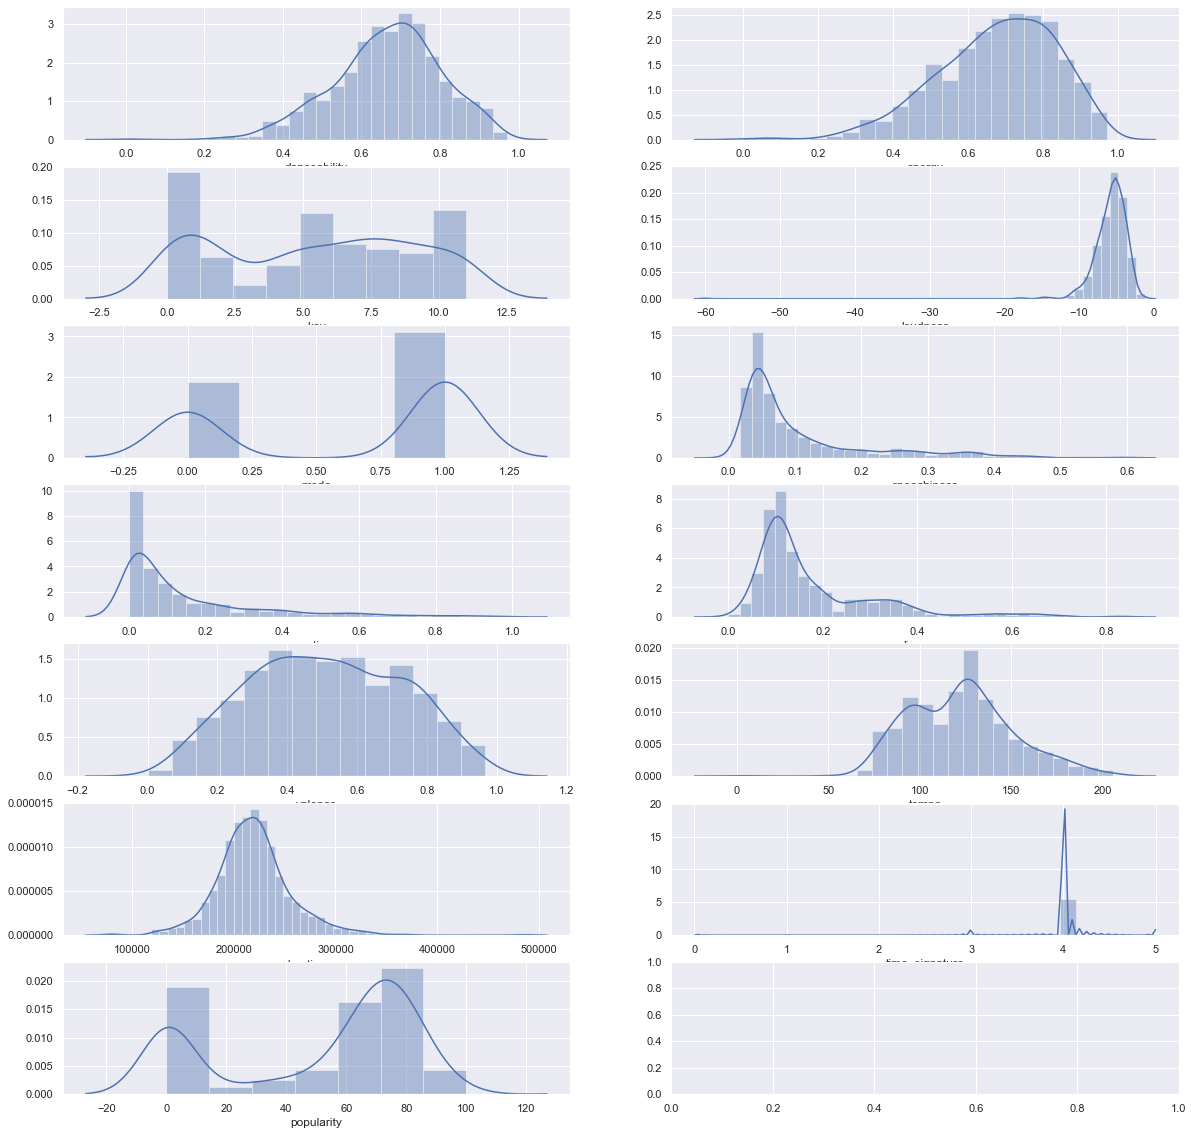

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#plot histogram
f,ax = plt.subplots(7,2,figsize=(20,20))
sns.distplot(b['danceability'],ax=ax[0,0])
sns.distplot(b['energy'],ax=ax[0,1])
sns.distplot(b['key'],ax=ax[1,0])
sns.distplot(b['loudness'],ax=ax[1,1])
sns.distplot(b['mode'],ax=ax[2,0])
sns.distplot(b['speechiness'],ax=ax[2,1])
sns.distplot(b['acousticness'],ax=ax[3,0])
sns.distplot(b['liveness'],ax=ax[3,1])
sns.distplot(b['valence'],ax=ax[4,0])
sns.distplot(b['tempo'],ax=ax[4,1])
sns.distplot(b['duration_ms'],ax=ax[5,0])
sns.distplot(b['time_signature'],ax=ax[5,1])
sns.distplot(b['popularity'],ax=ax[6,0])

In [ ]:
#check correlations between attributes and ranking 
corrDf = b.corr()
corr=corrDf['ranking'].sort_values(ascending=False)
print('correlation with ranking:', corr)

correlation with ranking: ranking             1.000000
key                 0.072155
mode                0.059356
tempo               0.043276
loudness            0.019211
liveness            0.017837
speechiness         0.002055
energy              0.001692
instrumentalness   -0.009022
acousticness       -0.009362
time_signature     -0.039327
popularity         -0.045804
duration_ms        -0.076625
valence            -0.078835
danceability       -0.099425
Name: ranking, dtype: float64


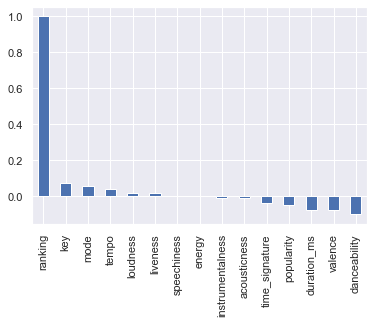

In [ ]:
corr.plot(kind='bar')

drop features
*   acousticness       -0.015133
*   speechiness        -0.020219

In [ ]:
#draw correlation matrix
#cor_columns = ['danceability','energy','key','loudness','mode',	'speechiness','acousticness','instrumentalness','liveness','valence','tempo',	'duration_ms','time_signature','popularity'] 
cor_columns = ['danceability','energy','key','loudness','mode',	'instrumentalness','liveness','valence','tempo',	'duration_ms','time_signature','popularity'] 
cor_matrix =b[cor_columns].corr()
corr = pd.melt(cor_matrix.reset_index(), id_vars='index')
corr.head()

corr.columns = ['x', 'y', 'value']
corr = corr[corr['x'] != corr['y']]
corr

,x,y,value
1,energy,danceability,-0.131494
2,key,danceability,0.016344
3,loudness,danceability,0.039747
4,mode,danceability,-0.074369
5,instrumentalness,danceability,0.042139
...,...,...,...
138,liveness,popularity,-0.041148
139,valence,popularity,0.026345
140,tempo,popularity,-0.059088
141,duration_ms,popularity,-0.125213


In [ ]:
'''
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256        # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )
corr = data.corr() 

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
'''

'\ndef heatmap(x, y, **kwargs):\n    if \'color\' in kwargs:\n        color = kwargs[\'color\']\n    else:\n        color = [1]*len(x)\n\n    if \'palette\' in kwargs:\n        palette = kwargs[\'palette\']\n        n_colors = len(palette)\n    else:\n        n_colors = 256        # Use 256 colors for the diverging color palette\n        palette = sns.color_palette("Blues", n_colors) \n\n    if \'color_range\' in kwargs:\n        color_min, color_max = kwargs[\'color_range\']\n    else:\n        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation\n\n    def value_to_color(val):\n        if color_min == color_max:\n            return palette[-1]\n        else:\n            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range\n            val_position = min(max(val_position, 0), 1) # bound the position betwen 

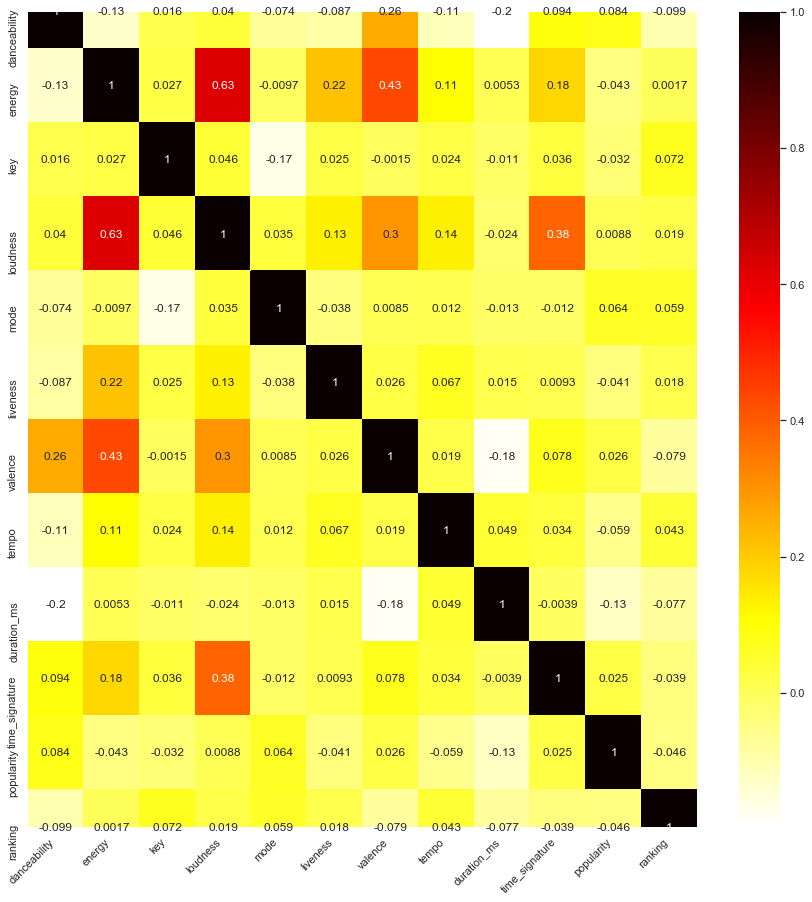

In [ ]:
#data = b.loc[:,['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',	'duration_ms','time_signature','popularity','ranking']] 
data= b.loc[:,['danceability','energy','key','loudness','mode','liveness','valence','tempo','duration_ms','time_signature','popularity','ranking']]

f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, fmt = '.2g', cmap = 'hot_r', ax= ax) 
sns.set(font_scale = 0.6) #the font size of the value in the heat map
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

#divide rankings:
1.   1-25
2.   26-50
3.   51-75
4.   76-100



In [ ]:
r=data['ranking']
len(r)  #586

888

In [ ]:
new_r=list()
new_r
#divide levels
for i in range(0,len(r)):
  if  r.iloc[i]>=1 and r.iloc[i]<=20:
    new_r.append(1)
  elif r.iloc[i]>=21 and r.iloc[i]<=40:
    new_r.append(2)
  elif r.iloc[i]>=41 and r.iloc[i]<=60:
    new_r.append(3)
  elif r.iloc[i]>=61 and r.iloc[i]<=80:
    new_r.append(4)
  else:
    new_r.append(5)
print(new_r)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
r=pd.DataFrame(new_r,columns=['levels'])
print('r shape: ',r.shape )
print('data shape: ',data.shape ) #same row numbers

r shape:  (888, 1)
data shape:  (888, 12)


In [ ]:
#df=pd.merge(b,r,how='inner',left_index=False, right_index=False,on=None, left_on=None, right_on=None)
df=pd.merge(data,r,on=b.index)
df=df.drop('key_0', axis=1)
df.head(5)

,danceability,energy,key,loudness,mode,liveness,valence,tempo,duration_ms,time_signature,popularity,ranking,levels
0,0.700,0.722,7.0,-3.558,0.0,0.2720,0.756,90.989,140526.0,4.0,99,1,1
1,0.736,0.802,0.0,-4.759,1.0,0.0940,0.675,144.005,172325.0,4.0,88,2,1
2,0.554,0.576,6.0,-6.495,1.0,0.1590,0.409,74.942,209763.0,4.0,73,3,1
3,0.761,0.518,0.0,-8.871,1.0,0.1070,0.522,133.976,261493.0,4.0,93,4,1
4,0.514,0.730,1.0,-5.934,1.0,0.0897,0.334,171.005,200040.0,4.0,96,5,1


#analysis dancibility and energy

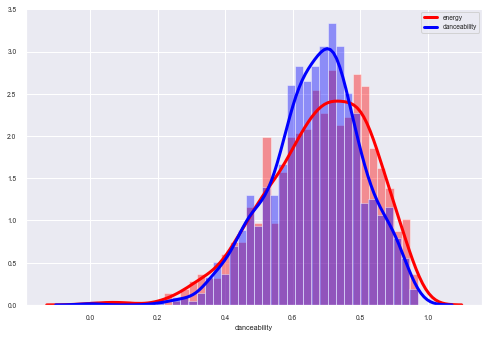

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(df['energy'], color='red', bins=40,kde_kws={"lw": 3,"label":'energy'})
sns.distplot(df['danceability'], color='blue', bins=40,kde_kws={"lw": 3,"label":'danceability'})
#plt.legend((energy,danceability))
plt.legend(('energy','danceability'))

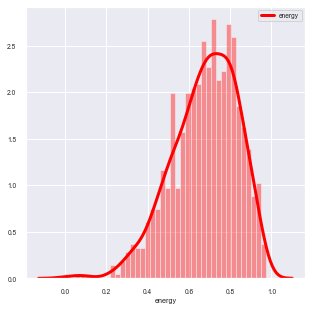

In [ ]:
plt.figure(figsize=(5,5))
#plt.subplot(2,2,1)
sns.distplot(df['energy'], color='red', bins=40,kde_kws={"lw": 3,"label":'energy'})
#sns.distplot(df['danceability'], color='blue', bins=40,kde_kws={"lw": 3,"label":'danceability'})
#plt.legend((energy,danceability))
#plt.legend(('energy','danceability'))

In [ ]:
df.sort_values(by='energy',ascending = False,).head(10)

,danceability,energy,key,loudness,mode,liveness,valence,tempo,duration_ms,time_signature,popularity,ranking,levels
691,0.585,0.972,9.0,-4.450,0.0,0.0707,0.585,110.006,230253.0,4.0,73,100,5
810,0.508,0.957,11.0,-1.562,1.0,0.5460,0.830,173.555,276920.0,4.0,0,21,2
813,0.855,0.954,0.0,-1.190,0.0,0.2050,0.668,114.635,248133.0,5.0,79,24,2
453,0.624,0.953,4.0,-2.602,0.0,0.6570,0.729,149.992,211573.0,4.0,0,55,3
549,0.494,0.951,9.0,-4.237,1.0,0.3270,0.441,160.025,202496.0,4.0,72,93,5
50,0.572,0.949,4.0,-4.865,1.0,0.1630,0.530,118.974,194867.0,4.0,76,51,3
843,0.529,0.948,0.0,-3.527,1.0,0.2830,0.650,146.024,238000.0,4.0,65,54,3
565,0.457,0.948,10.0,-3.364,1.0,0.0536,0.878,148.000,208960.0,4.0,71,9,1
754,0.644,0.945,7.0,-3.534,1.0,0.1840,0.573,91.017,219560.0,4.0,55,63,4
742,0.586,0.945,7.0,-4.577,0.0,0.3970,0.483,155.953,283733.0,4.0,37,51,3


In [ ]:
print(df['energy'].mean()) 
print(df[df['levels']==1]['energy'].mean()) 
print(df[df['levels']==2]['energy'].mean()) 
print(df[df['levels']==3]['energy'].mean()) 
print(df[df['levels']==4]['energy'].mean()) 
print(df[df['levels']==5]['energy'].mean())

0.6769829954954937
0.6868172043010752
0.6697430167597765
0.6690335195530724
0.6767410112359554
0.6826024096385538


In [ ]:
print(df['danceability'].mean()) 
print(df[df['levels']==1]['danceability'].mean()) 
print(df[df['levels']==2]['danceability'].mean())
print(df[df['levels']==3]['danceability'].mean())
print(df[df['levels']==4]['danceability'].mean())
print(df[df['levels']==5]['danceability'].mean())

0.6668862612612603
0.6875698924731185
0.6781005586592175
0.6578212290502794
0.6495168539325843
0.6600180722891565


In [ ]:
#take tempo as an example
df.tempo.mean()   #122.7376756756757
print(df[df['levels']==1]['tempo'].mean())  #118.74089784946226
print(df[df['levels']==5]['tempo'].mean())  #120.65328915662649

118.74089784946226
120.65328915662649


In [ ]:
df.key.mean()

5.41554054054054

In [ ]:
df.loudness.mean()

-5.75695495495495

In [ ]:
df.duration_ms.mean()  #219487.80292792793
print(df[df['levels']==1]['duration_ms'].mean())  #3.72
print(df[df['levels']==5]['duration_ms'].mean())   #3.579

223705.3817204301
214796.6204819277


#3. train & test 

In [ ]:
print('Dataset: ', df.shape[0], 'Rows', df.shape[1], 'Features')

NameError: ignored

In [ ]:
df.columns

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
#features = ['danceability','energy','key','loudness','speechiness','instrumentalness','liveness','valence','tempo','duration_ms','popularity']
features = ['danceability','key','loudness','mode','liveness','valence','tempo','duration_ms','time_signature','popularity']
#features = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','popularity']

X = df[features]
y = df['levels']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [ ]:
print('train dataset features: ',X_train.shape,
     'test dataset features: ',X_test.shape)
print('train dataset labels: ',y_train.shape,
     'test dataset labels: ',y_test.shape)

In [ ]:
'''
#给数据乘上一个数10，100或1000… 让数据的最小非零数在数据的个位以上to avoid ValueError: Unknown label type: 'continuous'
X_train=X_train*1000
y_train=y_train*1000
X_test=X_test*1000
y_test=y_test*1000
'''

#4.
4.1 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_std=scaler.fit_transform(X)
X_std_train=scaler.fit_transform(X_train)
X_std_test=scaler.fit_transform(X_test)

4.2 PCA

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components='mle', random_state=42)
X_std_pca=pca.fit_transform(X_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))  #9

Explained variation per principal component: [0.1675882  0.13970421 0.11961433 0.10126386 0.09646827 0.09280524
 0.0832233  0.0783033  0.07076115]


In [ ]:
df_pca=pd.DataFrame(data=X_std_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.988096,1.404019,0.936115,0.958156,1.500792,0.712481,0.089334,-0.440755,-1.328236
1,-1.177783,1.163384,-1.776084,0.496373,0.061664,-0.871065,0.771382,-0.398346,-0.219924
2,0.636223,0.784102,-0.561871,-0.611344,0.936836,0.903451,-1.112035,-0.086928,-0.592930
3,0.634054,0.896920,-1.570437,-0.550326,-0.040383,-0.204478,1.362640,0.975825,0.853935
4,0.590168,-0.228312,-1.998022,0.081310,1.074263,-1.574916,0.953356,-0.701719,-0.314980
...,...,...,...,...,...,...,...,...,...
883,1.212602,0.341209,-1.376241,-1.061501,0.523308,1.116318,-0.098611,-0.744100,-0.109942
884,-1.027167,0.773348,-1.501222,-0.065239,-0.765968,-0.245130,0.128865,0.362387,-0.849767
885,0.549792,-0.581168,-0.697388,0.315098,1.376433,2.882563,-1.610161,-0.616785,-0.887646
886,-0.656357,-1.101090,-1.163410,1.553472,1.006629,0.477269,-0.138843,-0.077518,-0.151141


In [ ]:
pca.components_ #check every components

array([[-0.37329825, -0.07647729, -0.53969511,  0.01959458, -0.08107658,
        -0.51729938, -0.06063972,  0.28611027, -0.43287637, -0.12670674],
       [ 0.43261772, -0.12655085, -0.36979495,  0.03512149, -0.35051755,
         0.11697691, -0.43006945, -0.40732412, -0.26444628,  0.31858171],
       [ 0.19174592,  0.61270325, -0.13067206, -0.7069256 ,  0.05063588,
        -0.02006949, -0.09812142, -0.01930892, -0.05881748, -0.2336286 ],
       [-0.04392618, -0.06938317, -0.09772916,  0.02521944,  0.5990352 ,
         0.28997116,  0.28894998, -0.38002194, -0.55217243, -0.0856729 ],
       [-0.23587579,  0.32221683,  0.02332972, -0.01996967,  0.29378286,
        -0.32129549, -0.01239057, -0.16523386,  0.10921145,  0.78145621],
       [ 0.03263444, -0.28234924,  0.05830923, -0.08715748,  0.56587446,
        -0.03561472, -0.72832081,  0.17457568,  0.12763792, -0.09754939],
       [ 0.19546302, -0.58925563, -0.06993787, -0.59684297,  0.03036823,
        -0.05064184,  0.3453327 ,  0.19970992

Text(0, 0.5, 'Principal components')

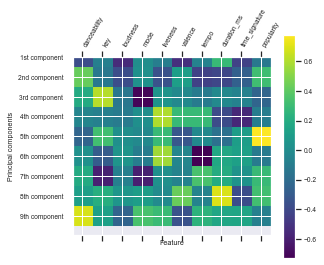

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9], ['1st component','2nd component','3rd component','4th component','5th component','6th component','7th component','8th component','9th component'])
plt.colorbar()
plt.xticks(range(len(features)),features, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

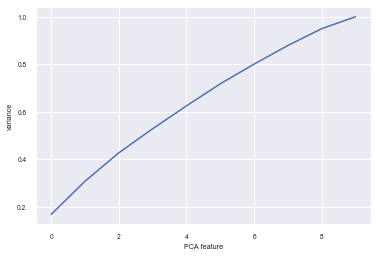

In [ ]:
pca_tr=PCA().fit(X_std)
plt.plot(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks()
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(scaler,PCA(n_components=10)) 
X_std_pca_tr=pipeline.fit_transform(X_train)
X_std_pca_te=pipeline.fit_transform(X_test)

##5. Models

In [ ]:
X_train.head(3)

,danceability,key,loudness,mode,liveness,valence,tempo,duration_ms,time_signature,popularity
695,0.602,5.0,-5.423,0.0,0.3890,0.732,150.183,206373.0,4.0,18
516,0.545,7.0,-4.867,0.0,0.0828,0.458,125.014,255093.0,4.0,1
366,0.653,6.0,-5.273,0.0,0.1440,0.401,123.999,234213.0,4.0,54


5.1 Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, random_state=10)
kmeans.fit(X_std_train,y_train)
#print(kmeans.labels_)  #0,1,2,3,4
kmeans_pred=kmeans.predict(X_std_test)   #clusters = k_means.fit_predict(scaled_data)
kmeans_pred

array([2, 3, 3, 2, 0, 2, 3, 0, 3, 0, 2, 3, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1,
       0, 2, 0, 2, 3, 0, 2, 0, 3, 1, 0, 3, 0, 2, 1, 3, 1, 2, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 2, 3, 2, 0, 0, 3, 2, 1, 3, 0, 0, 2, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 1, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0,
       2], dtype=int32)

In [ ]:
kmeans_score = accuracy_score(y_test,kmeans_pred+1)
print('Accuracy using KMeans:', round(kmeans_score*100,4),'%')

Accuracy using KMeans: 24.7191 %


In [ ]:
'''
from scipy.stats import mode
k_means_pred= np.zeros_like(y_pred)
for i in range(5):
    mask=(y_pred== i)
    k_means_pred[mask] = mode(y_test[mask])[0]
'''

'\nfrom scipy.stats import mode\nk_means_pred= np.zeros_like(y_pred)\nfor i in range(5):\n    mask=(y_pred== i)\n    k_means_pred[mask] = mode(y_test[mask])[0]\n'

Text(66.00000000000003, 0.5, 'True Level')

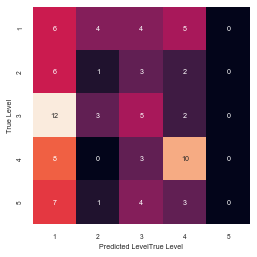

In [ ]:
mat=confusion_matrix(y_test,kmeans_pred+1)
cm_kmeans= pd.DataFrame(mat,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
ax=sns.heatmap(cm_kmeans, square=True, annot=True, fmt='d', cbar=False)
ax.set_ylim([5, 0])
plt.xlabel('Predicted Level')
plt.ylabel('True Level')

5.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_std_train, y_train)
lr_pred=lr.predict(X_std_test)

lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_score = accuracy_score(y_test, lr_pred)
print('Accuracy using Logistics Regression:', round(lr_score*100, 4),'%')

Accuracy using Logistics Regression: 26.9663 %


In [ ]:
lr.predict_proba(X_std_train)[0]

array([0.17121647, 0.21575613, 0.23751569, 0.21976926, 0.15574246])

In [ ]:
lr.coef_

array([[ 0.11598786, -0.09812599, -0.01479043, -0.05035058, -0.03146876,
         0.28639944, -0.2083428 ,  0.27140872,  0.05556407,  0.19407756],
       [ 0.10634917, -0.00556128, -0.07184279, -0.07644877, -0.04161219,
         0.02777677, -0.00238988,  0.03997618,  0.02698651, -0.01739212],
       [-0.01548872,  0.06149301, -0.00486914, -0.01851169,  0.06386245,
        -0.18785675,  0.17369351, -0.00425497,  0.20488122, -0.12464733],
       [-0.09318318, -0.01462644, -0.10016699,  0.08054061,  0.00241025,
        -0.06959375,  0.1635236 , -0.17280095, -0.06517582, -0.04128057],
       [-0.06955573,  0.08205572,  0.33282788,  0.09569746, -0.01262207,
        -0.09455821, -0.13821141, -0.18456682, -0.15674521, -0.00582483]])

In [ ]:
lr.intercept_

array([-1.38674332, -1.32879167, -1.43545086, -1.42291284, -1.48671706])

In [ ]:
l=pd.DataFrame(lr_pred,columns=['pred'])
y=pd.DataFrame(y_test)
l.index=y.index
c=pd.merge(l,y,how='inner',left_index=True,right_index=True)

Text(66.00000000000003, 0.5, 'Predicted Level')

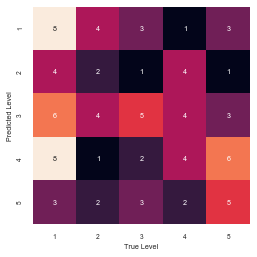

In [ ]:
mat=confusion_matrix(y_test,lr_pred)
cm_lr = pd.DataFrame(mat,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
ax=sns.heatmap(cm_lr, square=True, annot=True, fmt='d', cbar=False)
ax.set_ylim([5, 0])
plt.xlabel('True Level')
plt.ylabel('Predicted Level')

In [ ]:
proba = lr.predict_proba(X_std_test)[:,1]
y_score=np.array(lr.predict_proba(X_std_test)[:,1])
y_true=np.array(y_test)
roc_auc_score(y_true, y_score)
'''roc is only used for binary'''

ValueError: multiclass format is not supported

In [ ]:
X_std_test

array([[-1.89909492e-01, -1.16529099e+00,  8.17100663e-01,
        -1.33463478e+00, -4.72405807e-01, -4.45967868e-01,
         3.92023169e-01, -1.81815022e+00,  1.21070147e-01,
         5.16453853e-01],
       [-1.42985714e-01, -1.44038621e+00,  6.65909369e-01,
         7.49268649e-01, -5.53137087e-01, -1.33496574e+00,
         3.96146853e-01,  3.06965589e-01,  1.21070147e-01,
         3.35134749e-01],
       [-1.28792590e+00, -8.90195767e-01,  1.94424322e-01,
         7.49268649e-01, -7.54231367e-01, -6.69833161e-03,
         2.83275719e-01,  2.94400274e+00,  1.21070147e-01,
        -1.48382862e-01],
       [ 3.73175843e-01,  1.58566121e+00,  1.25855817e+00,
        -1.33463478e+00, -7.25608458e-01,  9.71199326e-01,
         3.95007931e-01,  7.85904255e-01,  1.21070147e-01,
        -1.56871585e+00],
       [ 5.23331933e-01, -6.49101080e-02, -1.40177645e+00,
         7.49268649e-01, -6.04511538e-01, -5.92391046e-01,
         3.10766949e-01, -5.59256699e-01,  1.21070147e-01,
        -2.

In [ ]:
x1_min=X_std_train.min(axis=0)  #x1.shape(89,89)
x2_min=X_std_train.min(axis=0) 
x1_max=X_std_train.max(axis=0)
x2_max=X_std_train.max(axis=0)

t1 = np.linspace(x1_min,x1_max,89)
t2 = np.linspace(x2_min,x2_max,89)
x1,x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
#xtest = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
y_predict=lr.predict(x_show)
 
cm_light = mpl.colors.ListedColormap(['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb'])
cm_dark = mpl.colors.ListedColormap(['b', 'g', 'r', 'c', 'm'])

ValueError: X has 2 features per sample; expecting 10

In [ ]:
lr_pred      # 预测值
#lr_pred =lr_pred.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh( x1,x2,lr_pred.reshape(x1.shape) ,cm_dark)     # 预测值的显示


ValueError: cannot reshape array of size 89 into shape (890,890)

In [ ]:
plt.scatter(x1,x2, edgecolors='k', s=50, cmap=cm_light)    

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

5.3 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_std_train, y_train)
dt_pred= dt.predict(X_std_test)

dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_score = accuracy_score(y_test, dt_pred)
#score=dt.score(X_test,y_test)  print(score)#
print('Accuracy using Decision Tree:', round(dt_score*100,4),'%')

Accuracy using Decision Tree: 28.0899 %


Text(66.00000000000003, 0.5, 'True Level')

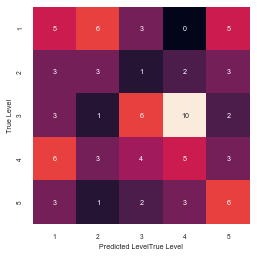

In [ ]:
mat=confusion_matrix(y_test,dt_pred)
cm_dt= pd.DataFrame(mat,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
ax=sns.heatmap(cm_dt, square=True, annot=True, fmt='d', cbar=False)

ax.set_ylim([5, 0])
plt.xlabel('Predicted LevelTrue Level')
plt.ylabel('True Level')

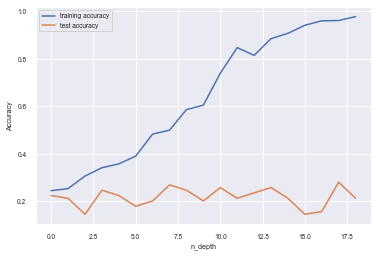

In [ ]:
max_depth = range(1,20)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth,max_features = 'auto')  #min_samples_leaf=2,min_impurity_decrease=0.1
    model.fit(X_std_train, y_train)
    test.append(model.score(X_std_test,y_test))
    train.append(model.score(X_std_train,y_train))

plt.plot( train, label='training accuracy')
plt.plot( test, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_depth')
plt.legend()

Text(0, 0.5, 'Features')

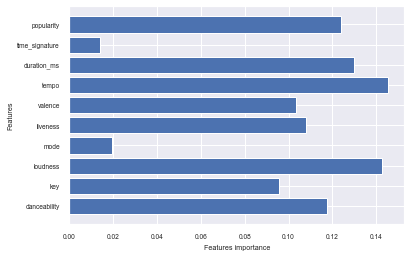

In [ ]:
#plot_feature_importances
n_features=df[features].shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel('Features importance')
plt.ylabel('Features')
#plt.title('Features Importance')

5.4 Support Vector Machine

In [ ]:
from sklearn import svm
svc_model=svm.SVC(kernel='linear')
svc_model.fit(X_std_train, y_train)
svm_pred =svc_model.predict(X_std_test)

svm_score= accuracy_score(y_test,svm_pred) * 100
print('Accuracy using Support Vector Machine: ', round(svm_score,4),'%')

print(confusion_matrix(y_test,svm_pred))
#print(classification_report(y_test,y_pred))

Accuracy using Support Vector Machine:  19.1011 %
[[7 3 4 1 4]
 [5 3 1 2 1]
 [5 6 3 3 5]
 [6 4 2 4 5]
 [3 4 3 5 0]]


5.5 KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_std_train, y_train)
knn_pred = knn.predict(X_std_test)

knn_score= accuracy_score(y_test, knn_pred) * 100
print('Accuracy using Knn Tree: ', round(knn_score,4),'%')

Accuracy using Knn Tree:  17.9775 %


In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.18      0.37      0.24        19
           2       0.20      0.33      0.25        12
           3       0.12      0.09      0.10        22
           4       0.20      0.10      0.13        21
           5       0.33      0.07      0.11        15

    accuracy                           0.18        89
   macro avg       0.21      0.19      0.17        89
weighted avg       0.20      0.18      0.16        89



#method1

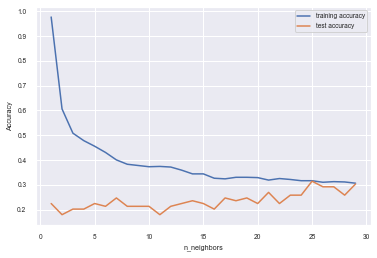

In [ ]:
# hyerparameter tuning
training_accuracy = []
test_accuracy = []

neighbors_range= range(1, 30) #try n_neighbors from 1 to 30
for n_neighbors in neighbors_range:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_std_train,y_train)
  training_accuracy.append( clf.score(X_std_train,y_train) )
  test_accuracy.append( clf.score(X_std_test,y_test) )


plt.plot(neighbors_range, training_accuracy, label='training accuracy')
plt.plot(neighbors_range, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_std_train, y_train)
rf_pred=rf.predict(X_std_test)

rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_score=accuracy_score(y_test, rf_pred)
print('Accuracy using Random Forest:', round(rf_score*100, 4),'%')

Accuracy using Random Forest: 14.6067 %


Text(66.00000000000003, 0.5, 'True Level')

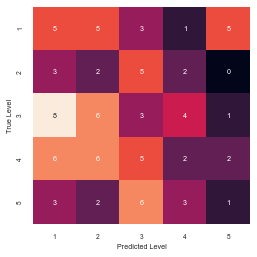

In [ ]:
mat=confusion_matrix(y_test,rf_pred)
cm_rf= pd.DataFrame(mat,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])
ax=sns.heatmap(cm_rf, square=True, annot=True, fmt='d', cbar=False)
ax.set_ylim([5, 0])
plt.xlabel('Predicted Level')
plt.ylabel('True Level')

In [ ]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(random_state=123)
param_grid=[{'n_estimators': range(15,40,1)}]
#param_grid=[{'n_estimators':[4,5,10,20,25,30,35,40,50]}]
grid_search_RF=GridSearchCV(RF,param_grid,cv=5)
grid_search_RF.fit(X_std_train,y_train)
grid_search_RF.best_params_
curves_RF=grid_search_RF.cv_results_

for mean_score,params in zip(curves_RF['mean_test_score'],curves_RF['params']):
    print(mean_score,params) #max n=33

0.24405506883604505 {'n_estimators': 15}
0.2553191489361702 {'n_estimators': 16}
0.2553191489361702 {'n_estimators': 17}
0.2528160200250313 {'n_estimators': 18}
0.2503128911138924 {'n_estimators': 19}
0.2528160200250313 {'n_estimators': 20}
0.246558197747184 {'n_estimators': 21}
0.24780976220275344 {'n_estimators': 22}
0.2565707133917397 {'n_estimators': 23}
0.25156445556946183 {'n_estimators': 24}
0.2453066332916145 {'n_estimators': 25}
0.2390488110137672 {'n_estimators': 26}
0.2428035043804756 {'n_estimators': 27}
0.25406758448060074 {'n_estimators': 28}
0.24780976220275344 {'n_estimators': 29}
0.2490613266583229 {'n_estimators': 30}
0.2503128911138924 {'n_estimators': 31}
0.2490613266583229 {'n_estimators': 32}
0.2490613266583229 {'n_estimators': 33}
0.2453066332916145 {'n_estimators': 34}
0.2453066332916145 {'n_estimators': 35}
0.24030037546933666 {'n_estimators': 36}
0.24155193992490614 {'n_estimators': 37}
0.24405506883604505 {'n_estimators': 38}
0.2490613266583229 {'n_estimators

In [ ]:
#AdaBoostClassifier and GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_std_train, y_train)
ada_pred = ada.predict(X_std_test)

score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(X_std_train, y_train)
predicted = gbc.predict(X_std_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using ada:  18.0 %
Accuracy using Gbc:  19.1 %


In [ ]:
#XGBoosts
from xgboost import XGBClassifier
from xgboost import plot_importance
clf  =  XGBClassifier(
        eval_metric = 'accuracy',
        learning_rate = 0.1,
        n_estimators = 100,
        max_depth = 3,
        subsample = 0.9,
        colsample_bytree = 0.9,
        silent = False )
#importance = clf.feature_importances_

xgb_bst= clf.fit(X_std_train,y_train,eval_set = [(X_std_test,y_test)],eval_metric = "mlogloss",early_stopping_rounds = 10,verbose = True)
xgb_pred = xgb_bst.predict(X_std_test)
xgb_score = accuracy_score(y_test,xgb_pred)*100

print("Accuracy using XGB: ", round(xgb_score, 1), "%")

[14:32:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.60681
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.60675
[2]	validation_0-mlogloss:1.60591
[3]	validation_0-mlogloss:1.60410
[4]	validation_0-mlogloss:1.60508
[5]	validation_0-mlogloss:1.60301
[6]	validation_0-mlogloss:1.60582
[7]	validation_0-mlogloss:1.60389
[8]	validation_0-mlogloss:1.60377
[9]	validation_0-mlogloss:1.60787
[10]	validation_0-mlogloss:1.60861
[11]	validation_0-mlogloss:1.61596
[12]	validation_0-mlogloss:1.61594
[13]	validation_0-mlogloss:1.61973
[14]	validation_0-mlogloss:1.62558
[15]	validation_0-mlogloss:1.62570
Stopping. Best iteration:

In [ ]:
proba = lr.predict_proba(X_std_test)[:,1]
proba

array([0.19866697, 0.18998559, 0.20297549, 0.23468281, 0.22822653,
       0.23026786, 0.21182446, 0.19903037, 0.21541976, 0.21359783,
       0.23838938, 0.14609763, 0.20423881, 0.20417651, 0.23659556,
       0.21721413, 0.18267629, 0.19216631, 0.21545006, 0.20185229,
       0.17340529, 0.20408033, 0.22594547, 0.21577904, 0.19978804,
       0.2531084 , 0.20911159, 0.17784842, 0.26412374, 0.22097044,
       0.1838439 , 0.23389302, 0.17752497, 0.26098527, 0.15802237,
       0.21023047, 0.18755329, 0.23567149, 0.17742127, 0.24643003,
       0.23457621, 0.20745002, 0.18699109, 0.21745652, 0.18134862,
       0.18719405, 0.21514423, 0.22094764, 0.18427871, 0.2472515 ,
       0.24873482, 0.21689024, 0.23117449, 0.24217998, 0.22235061,
       0.19170198, 0.16997457, 0.19010436, 0.22038825, 0.20070057,
       0.23599692, 0.18369926, 0.17303071, 0.1959087 , 0.1867506 ,
       0.23687243, 0.17345949, 0.14820131, 0.24471429, 0.20195958,
       0.19569322, 0.18485398, 0.22129999, 0.16432965, 0.21606

#6.visulization

In [ ]:
from sklearn.manifold import TSNE
df_tsne= TSNE(perplexity=10).fit_transform(scaled_data)

In [ ]:
#method1
from sklearn.neighbors import NearestNeighbors
df_clustering = scaler.fit_transform(df[features])
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df_clustering)

distances, indices = nbrs.kneighbors(df_clustering)

distances2 = [] 
for d in distances:
    distances2.extend(d[1:])
distances2 = np.array(sorted(distances2))
print("mean", np.mean(distances2)) 
print("std", np.std(distances2))

mean 1.5491908236874172
std 0.9367404013407062


In [ ]:
from sklearn.manifold import TSNE
df_tsne= TSNE(n_components=2,).fit_transform(X_std_test)

res1 = pd.DataFrame(data=df_tsne,columns=['tsne_x', 'tsne_y'])
res1['levels']=y_test.values

res1

,tsne_x,tsne_y,levels
0,-1.455886,3.445892,1
1,0.976400,2.932863,1
2,4.346106,2.064353,4
3,-0.546265,-0.461051,3
4,3.261198,0.545312,5
...,...,...,...
84,0.621784,4.158831,3
85,1.865853,5.927262,1
86,3.399184,5.546468,1
87,6.424542,0.677472,2


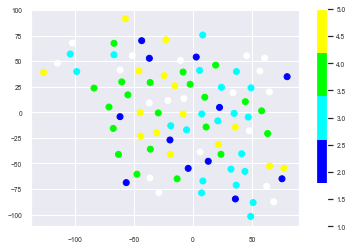

In [ ]:
from sklearn import manifold,datasets

import matplotlib as mpl 

tsne = manifold.TSNE(n_components=2, random_state=500).fit_transform(X_std_test)

colors = ['white', 'blue', 'cyan', 'Lime','yellow'] 
cmap = mpl.colors.ListedColormap(colors)

plt.scatter(tsne[:, 0],tsne[:, 1], c=y_test,cmap=cmap)
plt.colorbar()
plt.show() 